In [305]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 설정 (Matplotlib에서 한글 깨짐 방지)
import matplotlib.pyplot as plt

plt.rc("font", family="NanumGothic")  # Windows 사용자의 경우

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

# 기본 라이브러리
import polars as pl
import pandas as pd
import seaborn as sns
import numpy as np

# 시각화용 색상 팔레트
color_palette = sns.color_palette("Set2", as_cmap=False)

In [306]:
상품집계_고객집계 = pl.read_csv('data/상품집계_고객집계.csv')

In [307]:
상품집계_고객집계.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,f64,f64,f64,f64,f64,i64,f64,i64,i64,i64,str,i64,str
2065204669,0.0,0.0,0.0,0.0,1.85e6,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,722580.645161,1.3355e6,0.0,1.0152e6,0.0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""
4720215619,190322.580645,6451.612903,0.0,0.0,0.0,36,41.44086,2,1,30,"""일반등급""",0,"""A"""
4139190886,7.8290e6,0.0,0.0,6129.032258,0.0,36,655.55914,2,1,20,"""일반등급""",6,"""C"""
2243610603,200000.0,0.0,0.0,10000.0,5.65e6,6,1487.988889,3,2,20,"""일반등급""",0,"""A"""


In [308]:
상품_컬럼 = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품",
    "평균_카드", "평균_대출금액"
]

In [309]:
df = 상품집계_고객집계.clone()

상품_컬럼 = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품",
    "평균_카드", "평균_대출금액"
]

# 1️. 상품 보유 여부 0/1 처리
df_bin = df.with_columns([
    pl.col(col).gt(0).cast(pl.Int8).alias(col) for col in 상품_컬럼
])

In [310]:
df_bin

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,거래기간(개월),평균_총점수,최대_보유상품종류,평균_보유상품종류,연령대,최대_고객등급,KMeans_DB_KneeLocato_2030,중분류
i64,i8,i8,i8,i8,i8,i64,f64,i64,i64,i64,str,i64,str
2065204669,0,0,0,0,1,2,210.116667,1,1,30,"""일반등급""",0,"""A"""
4070774528,1,1,0,1,0,36,330.565591,3,2,20,"""일반등급""",0,"""A"""
4720215619,1,1,0,0,0,36,41.44086,2,1,30,"""일반등급""",0,"""A"""
4139190886,1,0,0,1,0,36,655.55914,2,1,20,"""일반등급""",6,"""C"""
2243610603,1,0,0,1,1,6,1487.988889,3,2,20,"""일반등급""",0,"""A"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…
4412204367,1,0,0,1,0,36,132.941935,2,2,20,"""일반등급""",0,"""A"""
3925855257,1,0,0,0,0,36,19.333333,1,0,30,"""일반등급""",0,"""A"""
6829335805,1,0,0,0,0,36,166.580645,1,1,30,"""일반등급""",0,"""A"""


In [311]:
def groupby_split_apply_concat_with_cluster(df: pl.DataFrame, 
                                            group_col: str, 
                                            agg_cols: list[str], 
                                            cluster_col: str,
                                            agg_func: str = "max",
                                            chunk_size: int = 100_000) -> pl.DataFrame:
    """
    대용량 데이터에서 groupby + agg 계산을 고객ID 단위로 나눠서 처리하고,
    클러스터 컬럼도 함께 병합해서 반환

    Parameters
    ----------
    df : pl.DataFrame
    group_col : str
    agg_cols : list[str]
    cluster_col : str
    agg_func : str
    chunk_size : int

    Returns
    -------
    pl.DataFrame
    """
    unique_ids = df.select(group_col).unique().to_series().to_list()
    chunks = [unique_ids[i:i + chunk_size] for i in range(0, len(unique_ids), chunk_size)]
    results = []

    for i, chunk_ids in enumerate(chunks):
        print(f"▶️ {i+1}/{len(chunks)} chunk 처리 중... (고객 {len(chunk_ids)}명)")

        df_chunk = df.filter(pl.col(group_col).is_in(chunk_ids))

        # 집계
        if agg_func == "max":
            result = df_chunk.group_by(group_col).agg([
                *[pl.col(col).max().alias(col) for col in agg_cols]
            ])
        else:
            raise ValueError("현재는 'max'만 지원됩니다.")

        # 클러스터 정보는 첫 번째 값으로 취득 (고객 단위로 고정값이기 때문에)
        cluster_info = df_chunk.select([pl.col(group_col), pl.col(cluster_col)])

        # 병합
        result = result.join(cluster_info, on=group_col, how="left")
        results.append(result)

    return pl.concat(results)


In [312]:
상품_컬럼 = [
    "평균_입출금예금", "평균_기타예금", "평균_비이자상품",
    "평균_카드", "평균_대출금액"
]
agg_cols = 상품_컬럼  # 원하는 수치형 컬럼
grouped_df = groupby_split_apply_concat_with_cluster(
    df=df_bin,
    group_col="고객ID",
    agg_cols=agg_cols,
    cluster_col="중분류"
)

▶️ 1/6 chunk 처리 중... (고객 100000명)
▶️ 2/6 chunk 처리 중... (고객 100000명)
▶️ 3/6 chunk 처리 중... (고객 100000명)
▶️ 4/6 chunk 처리 중... (고객 100000명)
▶️ 5/6 chunk 처리 중... (고객 100000명)
▶️ 6/6 chunk 처리 중... (고객 99499명)


In [313]:
grouped_df

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류
i64,i8,i8,i8,i8,i8,str
2251170374,1,0,0,0,1,"""A"""
4315529181,1,1,0,1,1,"""B"""
4673321252,0,0,0,1,0,"""A"""
5224942396,0,1,0,0,0,"""A"""
3707868878,1,1,0,1,0,"""C"""
…,…,…,…,…,…,…
5083418789,1,1,0,1,0,"""A"""
3572299683,0,1,0,0,0,"""A"""
5016764258,1,1,0,1,1,"""B"""


In [314]:
cluster_a_상품집계 = grouped_df.filter(pl.col("중분류") == "A").clone()
cluster_b_상품집계 = grouped_df.filter(pl.col("중분류") == "B").clone()
cluster_c_상품집계 = grouped_df.filter(pl.col("중분류") == "C").clone()
cluster_d_상품집계 = grouped_df.filter(pl.col("중분류") == "D").clone()

In [315]:
# 3. 상품 상태 컬럼 생성
def add_product_status_columns(cluster_df, product_cols):
    df = cluster_df.to_pandas().copy()
    for col in product_cols:
        df[col + "_상태"] = df[col].apply(lambda x: f"{col}-O" if x > 0 else f"{col}-X")
    return df

In [316]:
# 클러스터들을 리스트로 모아 반복 처리
cluster_dfs = [cluster_a_상품집계, cluster_b_상품집계, cluster_c_상품집계, cluster_d_상품집계]
cluster_dfs_status = []

for cluster in cluster_dfs:
    cluster_status = add_product_status_columns(cluster, 상품_컬럼)
    cluster_dfs_status.append(cluster_status)

In [317]:
cluster_a_상품집계_상품상태 = cluster_dfs_status[0]
cluster_b_상품집계_상품상태 = cluster_dfs_status[1]
cluster_c_상품집계_상품상태 = cluster_dfs_status[2]
cluster_d_상품집계_상품상태 = cluster_dfs_status[3]

In [318]:
cluster_a_상품집계_상품상태.head()

,고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류,평균_입출금예금_상태,평균_기타예금_상태,평균_비이자상품_상태,평균_카드_상태,평균_대출금액_상태
0,2251170374,1,0,0,0,1,A,평균_입출금예금-O,평균_기타예금-X,평균_비이자상품-X,평균_카드-X,평균_대출금액-O
1,4673321252,0,0,0,1,0,A,평균_입출금예금-X,평균_기타예금-X,평균_비이자상품-X,평균_카드-O,평균_대출금액-X
2,5224942396,0,1,0,0,0,A,평균_입출금예금-X,평균_기타예금-O,평균_비이자상품-X,평균_카드-X,평균_대출금액-X
3,4616314189,1,0,0,1,1,A,평균_입출금예금-O,평균_기타예금-X,평균_비이자상품-X,평균_카드-O,평균_대출금액-O
4,4237578682,1,0,0,1,0,A,평균_입출금예금-O,평균_기타예금-X,평균_비이자상품-X,평균_카드-O,평균_대출금액-X


In [319]:
print(cluster_a_상품집계_상품상태.shape[0])
print(cluster_b_상품집계_상품상태.shape[0])
print(cluster_c_상품집계_상품상태.shape[0])
print(cluster_d_상품집계_상품상태.shape[0])

484649
35471
70620
8759


In [320]:
def create_product_combination_polars_from_pandas(pandas_df: pd.DataFrame, product_cols, chunk_size: int = 200000):
    import pandas as pd
    import polars as pl
    from tqdm import tqdm
    import time

    start_time = time.time()
    
    # 1. pandas → polars 변환
    status_cols = [col + "_상태" for col in product_cols]
    pl_df = pl.from_pandas(pandas_df)  # ✅ 변환 필요
    
    total_rows = pl_df.height  # 이제 height 사용 가능
    total_chunks = (total_rows - 1) // chunk_size + 1
    print(f"전체 행 수: {total_rows} | 청크 크기: {chunk_size} → 총 {total_chunks}개 청크")

    # 2. 청크 단위로 처리하며 진행률 표시
    chunks = []
    for i in tqdm(range(0, total_rows, chunk_size), desc="상품조합 생성 중"):
        chunk = pl_df.slice(i, chunk_size)
        chunk = chunk.with_columns([
            pl.concat_str([pl.col(col) for col in status_cols], separator="_").alias("상품조합")
        ])
        chunks.append(chunk)

    # 3. 청크 합치기
    result = pl.concat(chunks)
    
    elapsed_time = time.time() - start_time
    print(f"[상품조합 생성 완료] 총 처리 시간: {elapsed_time:.2f}초")

    return result  # ✅ Polars DataFrame 리턴


In [321]:
cluster_a_pl = create_product_combination_polars_from_pandas(cluster_a_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 484649 | 청크 크기: 10000 → 총 49개 청크


상품조합 생성 중: 100%|██████████| 49/49 [00:00<00:00, 702.07it/s]

[상품조합 생성 완료] 총 처리 시간: 0.46초


In [322]:
cluster_b_pl = create_product_combination_polars_from_pandas(cluster_b_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 35471 | 청크 크기: 10000 → 총 4개 청크


상품조합 생성 중: 100%|██████████| 4/4 [00:00<00:00, 755.87it/s]

[상품조합 생성 완료] 총 처리 시간: 0.04초


In [323]:
cluster_c_pl = create_product_combination_polars_from_pandas(cluster_c_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 70620 | 청크 크기: 10000 → 총 8개 청크


상품조합 생성 중: 100%|██████████| 8/8 [00:00<00:00, 302.92it/s]

[상품조합 생성 완료] 총 처리 시간: 0.12초


In [324]:
cluster_d_pl = create_product_combination_polars_from_pandas(cluster_d_상품집계_상품상태, 상품_컬럼, chunk_size=10000)

전체 행 수: 8759 | 청크 크기: 10000 → 총 1개 청크


상품조합 생성 중: 100%|██████████| 1/1 [00:00<00:00, 497.31it/s]

[상품조합 생성 완료] 총 처리 시간: 0.01초


In [325]:
cluster_a_pl.head()

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류,평균_입출금예금_상태,평균_기타예금_상태,평균_비이자상품_상태,평균_카드_상태,평균_대출금액_상태,상품조합
i64,i8,i8,i8,i8,i8,str,str,str,str,str,str,str
2251170374,1,0,0,0,1,"""A""","""평균_입출금예금-O""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-X""","""평균_대출금액-O""","""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…"
4673321252,0,0,0,1,0,"""A""","""평균_입출금예금-X""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-O""","""평균_대출금액-X""","""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…"
5224942396,0,1,0,0,0,"""A""","""평균_입출금예금-X""","""평균_기타예금-O""","""평균_비이자상품-X""","""평균_카드-X""","""평균_대출금액-X""","""평균_입출금예금-X_평균_기타예금-O_평균_비이자상품-…"
4616314189,1,0,0,1,1,"""A""","""평균_입출금예금-O""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-O""","""평균_대출금액-O""","""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…"
4237578682,1,0,0,1,0,"""A""","""평균_입출금예금-O""","""평균_기타예금-X""","""평균_비이자상품-X""","""평균_카드-O""","""평균_대출금액-X""","""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…"


In [326]:
# 6. 조합별 고객 수 확인
combo_summary_cluster_a = (cluster_a_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))
combo_summary_cluster_b = (cluster_b_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))
combo_summary_cluster_c = (cluster_c_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))
combo_summary_cluster_d = (cluster_d_pl.group_by("상품조합").count().rename({"count": "고객수"}).sort("고객수", descending=True))

In [327]:
combo_summary_cluster_a

상품조합,고객수
str,u32
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",126343
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",93658
"""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…",63599
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",62333
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",45650
…,…
"""평균_입출금예금-X_평균_기타예금-O_평균_비이자상품-…",15
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",15
"""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…",5


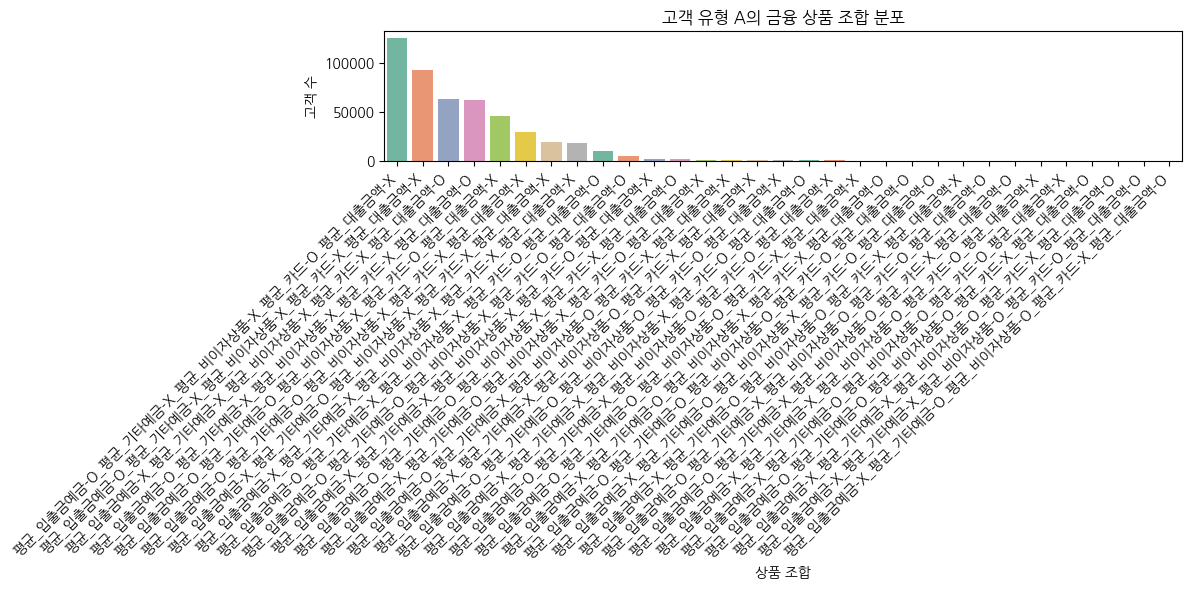

In [328]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combo_summary_cluster_a, x="상품조합", y="고객수", palette="Set2")
plt.title("고객 유형 A의 금융 상품 조합 분포")
plt.xlabel("상품 조합")
plt.ylabel("고객 수")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 클러스터별 상위 6개 조합 가져오기

In [329]:
top_n = 6

In [330]:
top_combos_0 = combo_summary_cluster_a.head(top_n)
top_combos_1 = combo_summary_cluster_b.head(top_n)
top_combos_2 = combo_summary_cluster_c.head(top_n)
top_combos_3 = combo_summary_cluster_d.head(top_n)

In [331]:
# 조합을 간단하게 표현하는 함수
def simplify_combo(combo_str):
    parts = [p.replace("-O", "") for p in combo_str.split("_") if "-O" in p]
    return "+".join(parts) if parts else "없음"

In [332]:
top_combos_0 = top_combos_0.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))
top_combos_1 = top_combos_1.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))
top_combos_2 = top_combos_2.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))
top_combos_3 = top_combos_3.with_columns(pl.col("상품조합").map_elements(simplify_combo).alias("간단조합"))


In [333]:
top_combos_0

상품조합,고객수,간단조합
str,u32,str
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",126343,"""입출금예금+카드"""
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",93658,"""입출금예금"""
"""평균_입출금예금-X_평균_기타예금-X_평균_비이자상품-…",63599,"""대출금액"""
"""평균_입출금예금-O_평균_기타예금-X_평균_비이자상품-…",62333,"""입출금예금+대출금액"""
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",45650,"""입출금예금+기타예금+카드"""
"""평균_입출금예금-O_평균_기타예금-O_평균_비이자상품-…",29383,"""입출금예금+기타예금"""


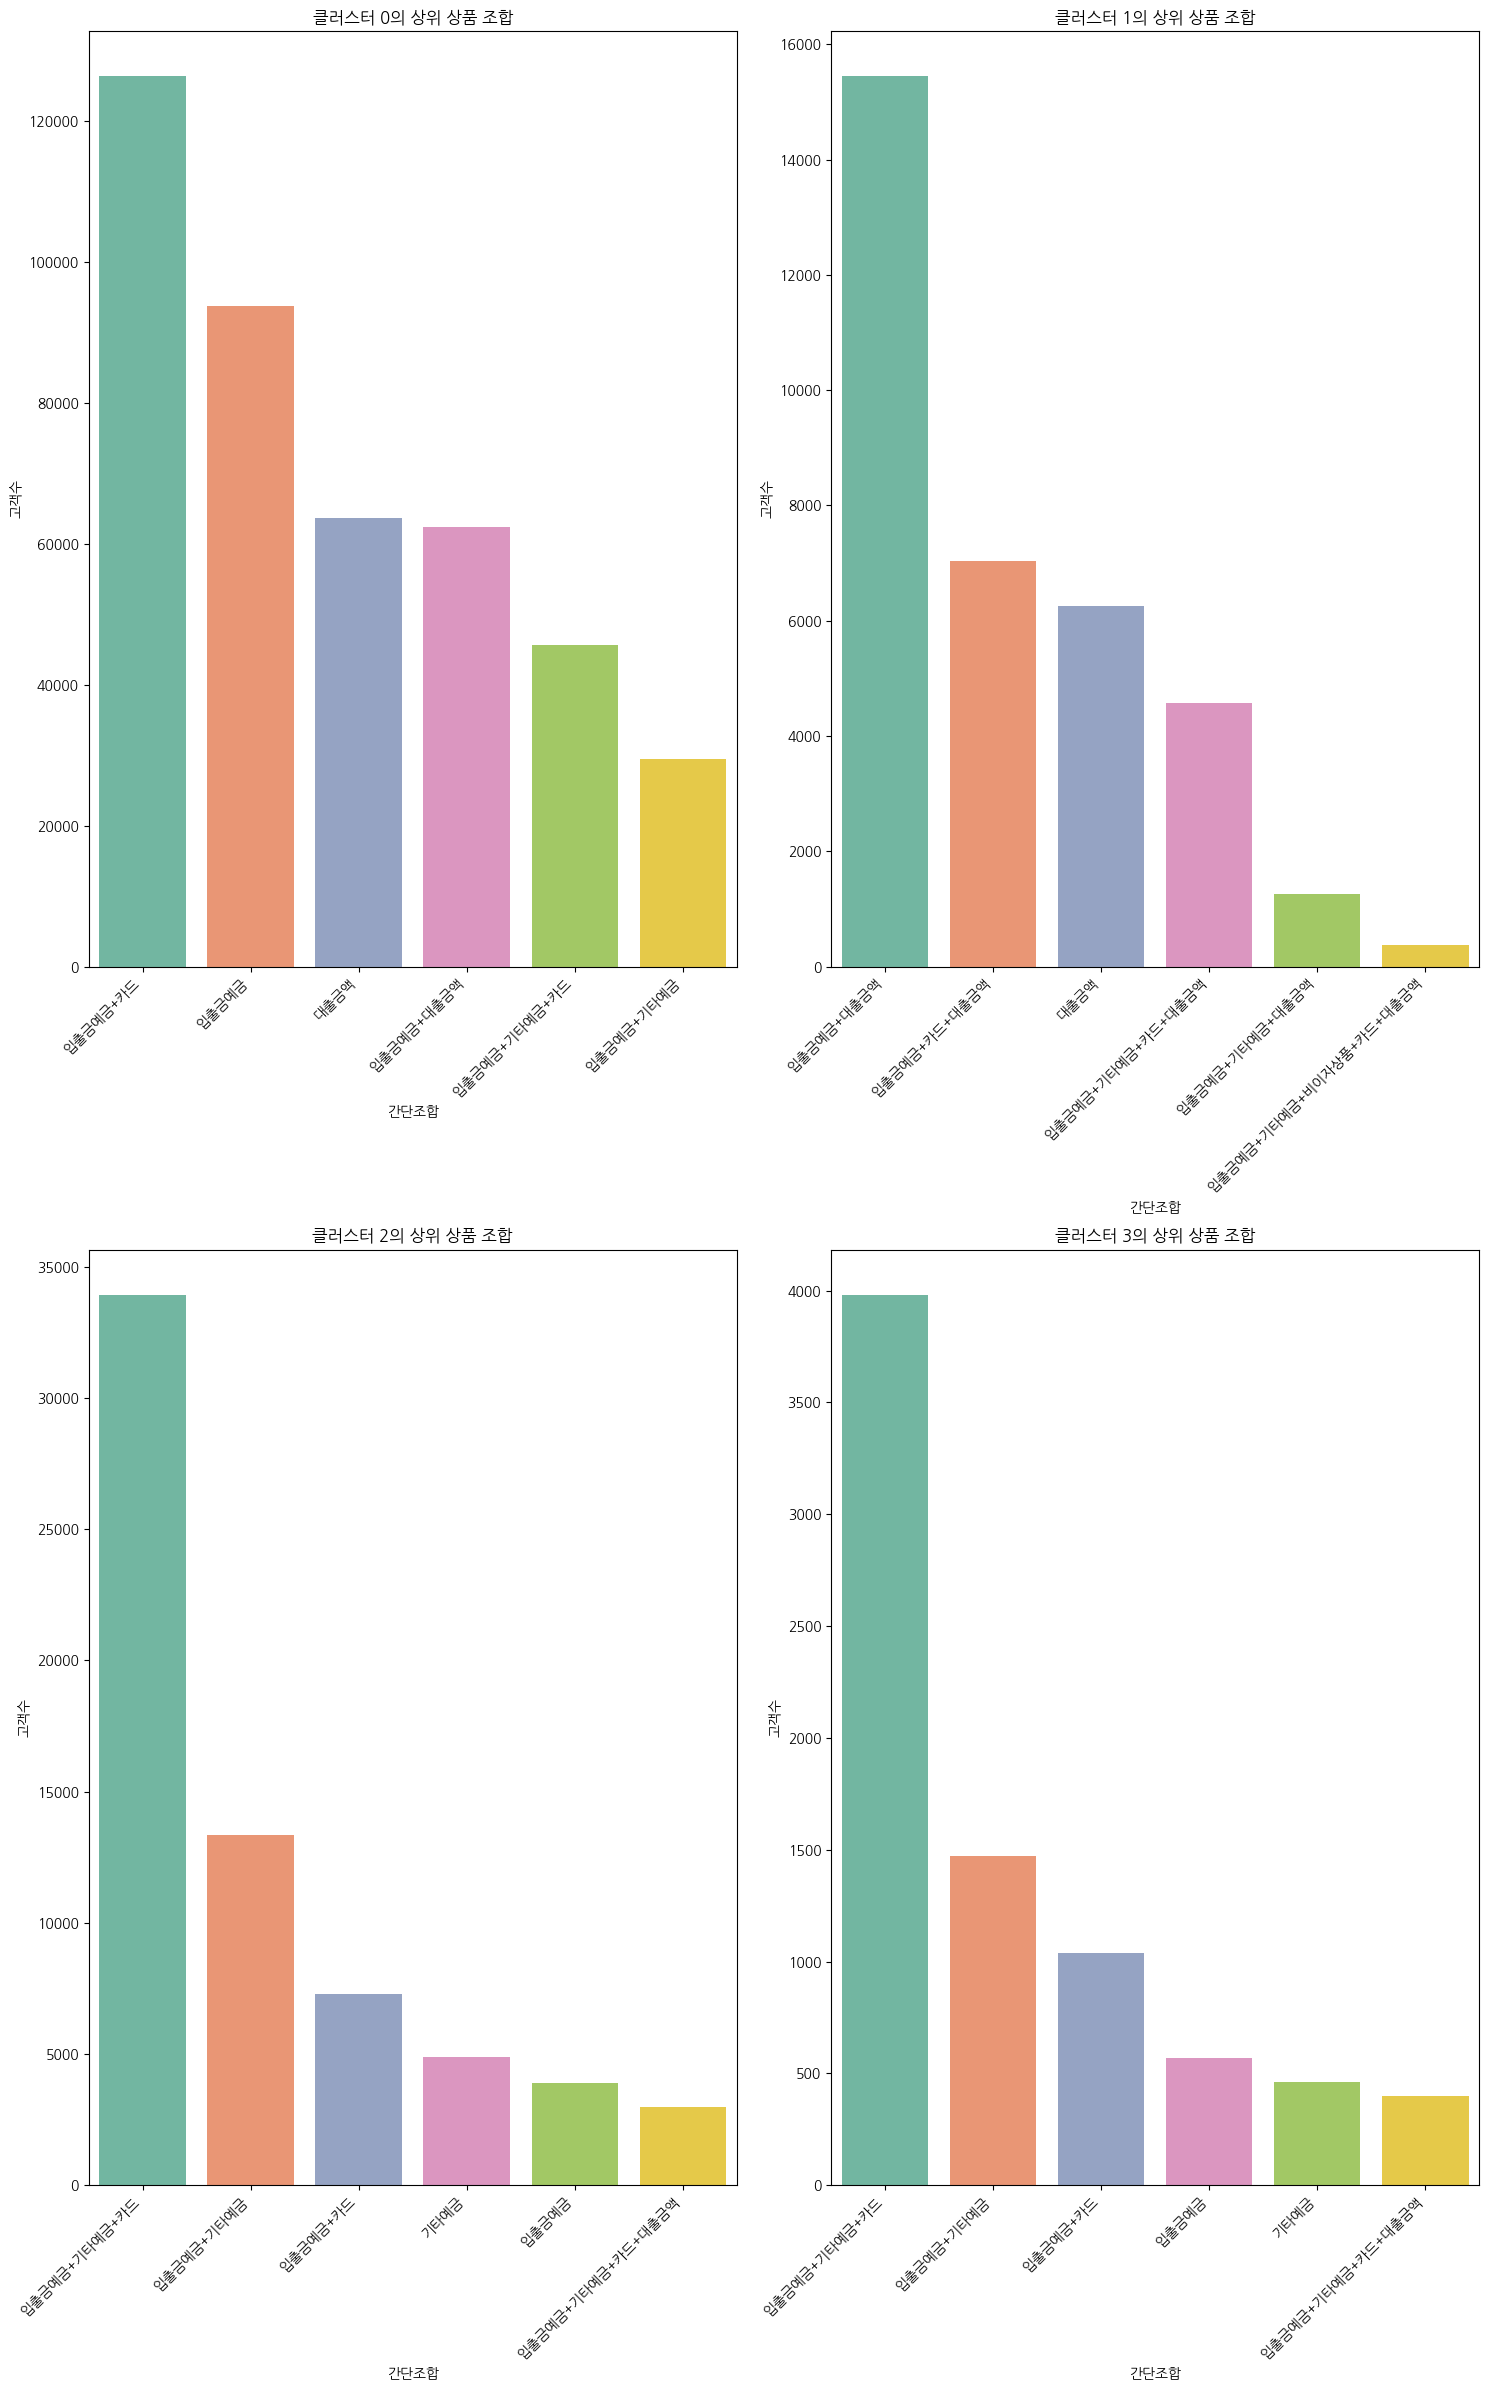

In [334]:
# 시각화
# 3x3 서브플롯 생성
fig, axes = plt.subplots(2, 2, figsize=(15, 24))  # 2x2 배치, 크기 조정
clusters = [top_combos_0, top_combos_1, top_combos_2, 
            top_combos_3]

titles = [f"클러스터 {i}의 상위 상품 조합" for i in range(9)]

for i, (df, ax, title) in enumerate(zip(clusters, axes.flatten(), titles)):
    # polars → pandas 변환
    top_combos_pd = df.select(["간단조합", "고객수"]).to_pandas()

    # Seaborn 막대 그래프
    sns.barplot(data=top_combos_pd, x="간단조합", y="고객수", palette="Set2", ax=ax)

    # 제목 및 설정
    ax.set_title(title, fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

### 1. 클러스터별 조합별 고객 수 pivot table → Heatmap

In [335]:
# 각 데이터프레임에 클러스터 번호 컬럼 추가
# 클러스터별 데이터프레임을 리스트로 저장
combo_summary_clusters = [combo_summary_cluster_a, combo_summary_cluster_b, combo_summary_cluster_c, 
                          combo_summary_cluster_d]

# 클러스터 번호 컬럼 추가 및 리스트 생성
combo_dfs = []
for i, df in enumerate(combo_summary_clusters):
    df = df.with_columns([
        pl.lit(i).alias("클러스터"),  # 클러스터 번호 추가
        pl.col("상품조합").map_elements(simplify_combo).alias("간단조합")  # map_elements() 사용
    ])
    combo_dfs.append(df.select(["클러스터", "간단조합", "고객수"]))  # 필요한 컬럼 선택

In [336]:
combo_dfs[0].head(6)

클러스터,간단조합,고객수
i32,str,u32
0,"""입출금예금+카드""",126343
0,"""입출금예금""",93658
0,"""대출금액""",63599
0,"""입출금예금+대출금액""",62333
0,"""입출금예금+기타예금+카드""",45650
0,"""입출금예금+기타예금""",29383


In [337]:
combo_dfs[1].head(6)

클러스터,간단조합,고객수
i32,str,u32
1,"""입출금예금+대출금액""",15454
1,"""입출금예금+카드+대출금액""",7032
1,"""대출금액""",6257
1,"""입출금예금+기타예금+카드+대출금액""",4567
1,"""입출금예금+기타예금+대출금액""",1266
1,"""입출금예금+기타예금+비이자상품+카드+대출금액""",375


In [338]:
# 하나의 데이터프레임으로 병합
combo_all = pl.concat(combo_dfs)

# pandas로 변환 후 피벗 테이블 생성
combo_all_pd = combo_all.to_pandas()
pivot = combo_all_pd.pivot_table(index="간단조합", columns="클러스터", values="고객수", fill_value=0)

In [339]:
pivot

클러스터,0,1,2,3
간단조합,,,,
기타예금,19238.0,0.0,4887.0,462.0
기타예금+대출금액,390.0,89.0,64.0,3.0
기타예금+비이자상품,72.0,0.0,42.0,1.0
기타예금+비이자상품+대출금액,1.0,3.0,0.0,0.0
기타예금+비이자상품+카드,15.0,0.0,1.0,0.0
기타예금+비이자상품+카드+대출금액,0.0,6.0,0.0,0.0
기타예금+카드,1219.0,0.0,248.0,11.0
기타예금+카드+대출금액,77.0,79.0,16.0,1.0
대출금액,63599.0,6257.0,0.0,0.0


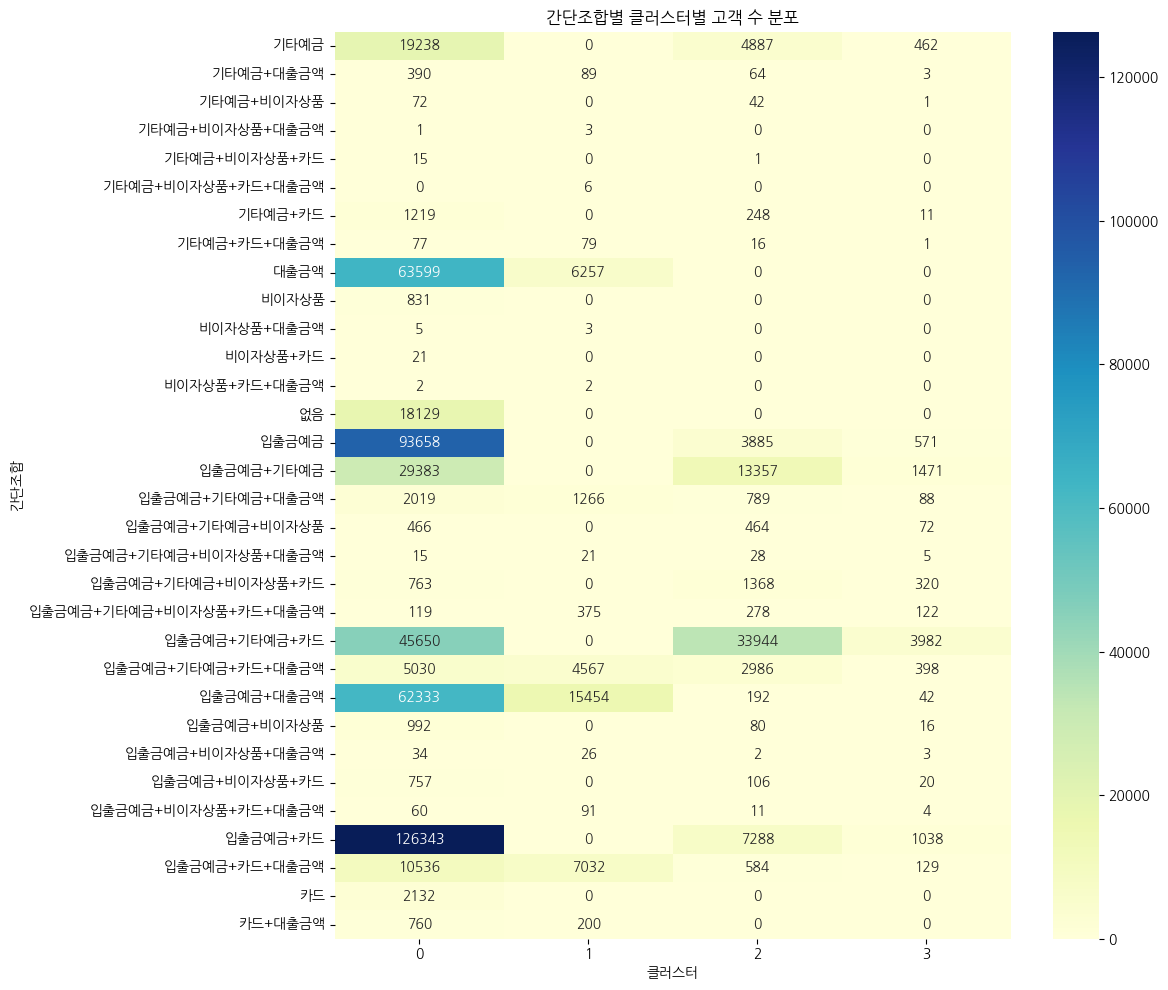

In [340]:
# Heatmap 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="g")
plt.title("간단조합별 클러스터별 고객 수 분포")
plt.xlabel("클러스터")
plt.ylabel("간단조합")
plt.tight_layout()
plt.show()

### 2. 클러스터별 각 조합 비중 비교 (비율 기반)

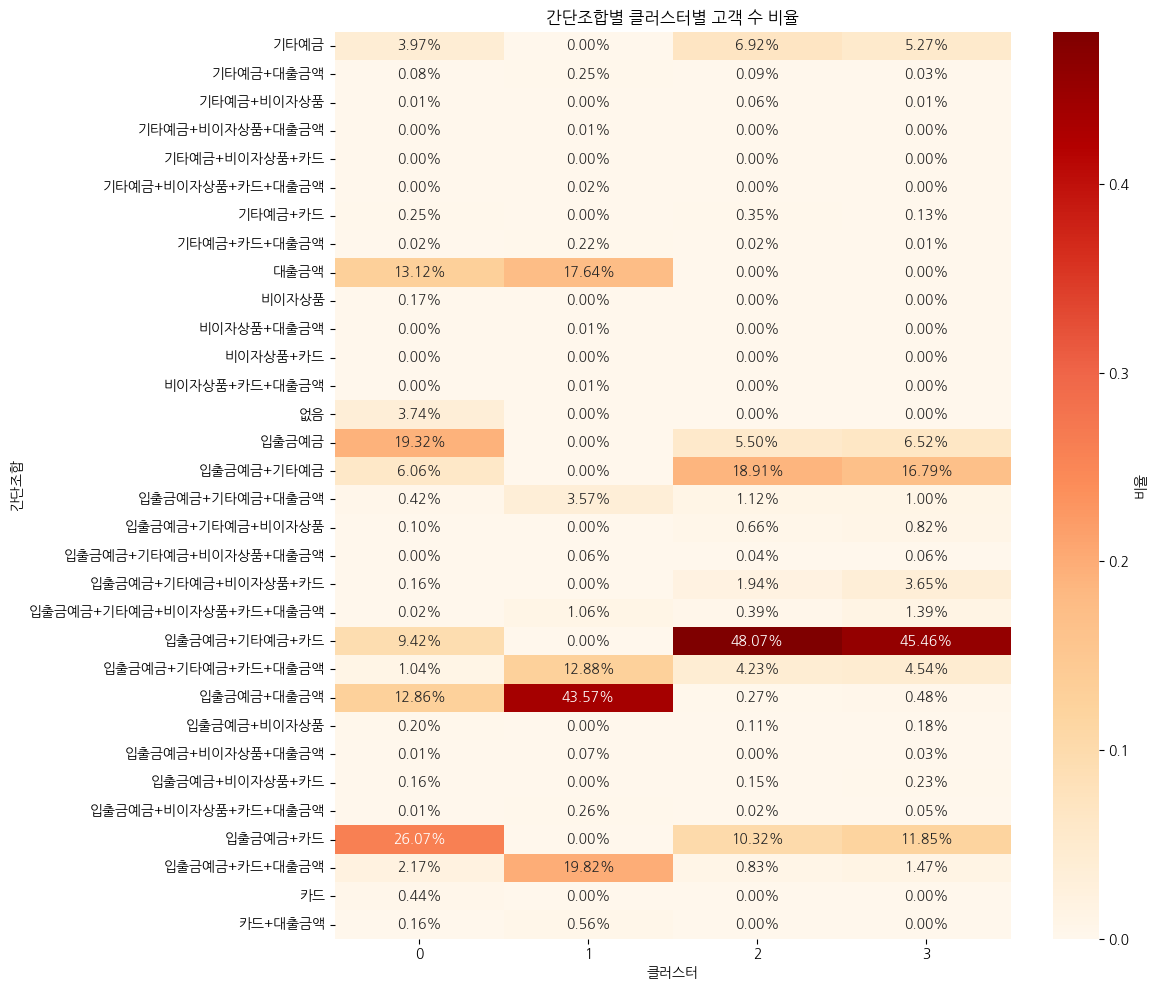

In [341]:
# 각 클러스터별로 전체 고객 수로 나눠서 비율 계산
pivot_ratio = pivot.divide(pivot.sum(axis=0), axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(pivot_ratio, cmap="OrRd", annot=True, fmt=".2%", cbar_kws={"label": "비율"})
plt.title("간단조합별 클러스터별 고객 수 비율")
plt.xlabel("클러스터")
plt.ylabel("간단조합")
plt.tight_layout()
plt.show()

In [342]:
pivot_ratio

클러스터,0,1,2,3
간단조합,,,,
기타예금,0.039695,0.000000,0.069201,0.052746
기타예금+대출금액,0.000805,0.002509,0.000906,0.000343
기타예금+비이자상품,0.000149,0.000000,0.000595,0.000114
기타예금+비이자상품+대출금액,0.000002,0.000085,0.000000,0.000000
기타예금+비이자상품+카드,0.000031,0.000000,0.000014,0.000000
기타예금+비이자상품+카드+대출금액,0.000000,0.000169,0.000000,0.000000
기타예금+카드,0.002515,0.000000,0.003512,0.001256
기타예금+카드+대출금액,0.000159,0.002227,0.000227,0.000114
대출금액,0.131227,0.176398,0.000000,0.000000


In [343]:
# 해석 예시
# 클러스터 2에서 '요구불예금+거치식예금+적립식예금+카드' 조합이 고객의 55.38% 차지

In [344]:
# 인덱스를 컬럼으로 변환
pivot_ratio = pivot_ratio.reset_index()
# '간단조합'을 제외한 나머지 클러스터 컬럼에서 최대값 계산
pivot_ratio["최대값"] = pivot_ratio.drop(columns=["간단조합"]).max(axis=1)
# 최대값 기준 내림차순 정렬 후 "최대값" 컬럼 제거
pivot_ratio_sorted = pivot_ratio.sort_values(by="최대값", ascending=False).drop(columns=["최대값"])

In [345]:
pivot_ratio_sorted.head(10)

클러스터,간단조합,0,1,2,3
21,입출금예금+기타예금+카드,0.094192,0.000000,0.480657,0.454618
23,입출금예금+대출금액,0.128615,0.435680,0.002719,0.004795
28,입출금예금+카드,0.260690,0.000000,0.103200,0.118507
29,입출금예금+카드+대출금액,0.021739,0.198246,0.008270,0.014728
14,입출금예금,0.193249,0.000000,0.055013,0.065190
15,입출금예금+기타예금,0.060627,0.000000,0.189139,0.167942
8,대출금액,0.131227,0.176398,0.000000,0.000000
22,입출금예금+기타예금+카드+대출금액,0.010379,0.128753,0.042283,0.045439
0,기타예금,0.039695,0.000000,0.069201,0.052746
13,없음,0.037406,0.000000,0.000000,0.000000


### 3. 특정 조합 기준으로 클러스터 특이성 확인

In [346]:
# pivot.loc["요구불+대출"].sort_values(ascending=False).plot(kind="bar")
# plt.title("요구불+대출 조합의 클러스터별 분포")
# plt.ylabel("고객 수")
# plt.xlabel("클러스터")
# plt.show()

# Editional EDA

In [347]:
grouped_df

고객ID,평균_입출금예금,평균_기타예금,평균_비이자상품,평균_카드,평균_대출금액,중분류
i64,i8,i8,i8,i8,i8,str
2251170374,1,0,0,0,1,"""A"""
4315529181,1,1,0,1,1,"""B"""
4673321252,0,0,0,1,0,"""A"""
5224942396,0,1,0,0,0,"""A"""
3707868878,1,1,0,1,0,"""C"""
…,…,…,…,…,…,…
5083418789,1,1,0,1,0,"""A"""
3572299683,0,1,0,0,0,"""A"""
5016764258,1,1,0,1,1,"""B"""


In [348]:
# 행 총합 추가
#pivot.loc['총합'] = pivot.sum()

# 열 총합 추가
pivot['총합'] = pivot.sum(axis=1)

In [349]:
pivot

클러스터,0,1,2,3,총합
간단조합,,,,,
기타예금,19238.0,0.0,4887.0,462.0,24587.0
기타예금+대출금액,390.0,89.0,64.0,3.0,546.0
기타예금+비이자상품,72.0,0.0,42.0,1.0,115.0
기타예금+비이자상품+대출금액,1.0,3.0,0.0,0.0,4.0
기타예금+비이자상품+카드,15.0,0.0,1.0,0.0,16.0
기타예금+비이자상품+카드+대출금액,0.0,6.0,0.0,0.0,6.0
기타예금+카드,1219.0,0.0,248.0,11.0,1478.0
기타예금+카드+대출금액,77.0,79.0,16.0,1.0,173.0
대출금액,63599.0,6257.0,0.0,0.0,69856.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '입출금예금+카드'),
  Text(1, 0, '입출금예금'),
  Text(2, 0, '입출금예금+기타예금+카드'),
  Text(3, 0, '입출금예금+대출금액'),
  Text(4, 0, '대출금액'),
  Text(5, 0, '입출금예금+기타예금'),
  Text(6, 0, '기타예금'),
  Text(7, 0, '입출금예금+카드+대출금액'),
  Text(8, 0, '없음'),
  Text(9, 0, '입출금예금+기타예금+카드+대출금액'),
  Text(10, 0, '입출금예금+기타예금+대출금액'),
  Text(11, 0, '입출금예금+기타예금+비이자상품+카드'),
  Text(12, 0, '카드'),
  Text(13, 0, '기타예금+카드'),
  Text(14, 0, '입출금예금+비이자상품'),
  Text(15, 0, '입출금예금+기타예금+비이자상품'),
  Text(16, 0, '카드+대출금액'),
  Text(17, 0, '입출금예금+기타예금+비이자상품+카드+대출금액'),
  Text(18, 0, '입출금예금+비이자상품+카드'),
  Text(19, 0, '비이자상품'),
  Text(20, 0, '기타예금+대출금액'),
  Text(21, 0, '기타예금+카드+대출금액'),
  Text(22, 0, '입출금예금+비이자상품+카드+대출금액'),
  Text(23, 0, '기타예금+비이자상품'),
  Text(24, 0, '입출금예금+기타예금+비이자상품+대출금액'),
  Text(25, 0, '입출금예금+비이자상품+대출금액'),
  Text(26, 0, '비이자상품+카드'),
  Text(27, 0

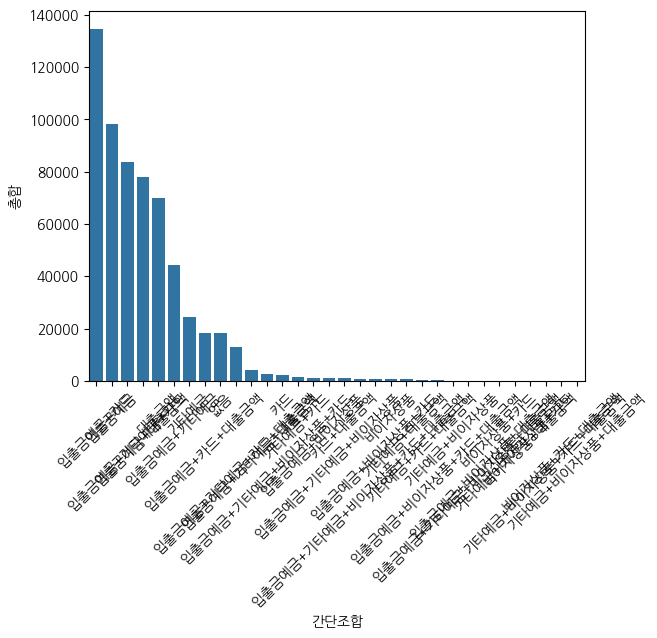

In [350]:
sns.barplot(pivot['총합'].sort_values(ascending = False))
plt.xticks(rotation = 45)

## 단일 상품과 복합 상품의 비교 

In [351]:
pivot.index

Index(['기타예금', '기타예금+대출금액', '기타예금+비이자상품', '기타예금+비이자상품+대출금액', '기타예금+비이자상품+카드',
       '기타예금+비이자상품+카드+대출금액', '기타예금+카드', '기타예금+카드+대출금액', '대출금액', '비이자상품',
       '비이자상품+대출금액', '비이자상품+카드', '비이자상품+카드+대출금액', '없음', '입출금예금', '입출금예금+기타예금',
       '입출금예금+기타예금+대출금액', '입출금예금+기타예금+비이자상품', '입출금예금+기타예금+비이자상품+대출금액',
       '입출금예금+기타예금+비이자상품+카드', '입출금예금+기타예금+비이자상품+카드+대출금액', '입출금예금+기타예금+카드',
       '입출금예금+기타예금+카드+대출금액', '입출금예금+대출금액', '입출금예금+비이자상품', '입출금예금+비이자상품+대출금액',
       '입출금예금+비이자상품+카드', '입출금예금+비이자상품+카드+대출금액', '입출금예금+카드', '입출금예금+카드+대출금액',
       '카드', '카드+대출금액'],
      dtype='object', name='간단조합')

In [352]:
# 5자 이하 및 5자 초과로 나누기
short_combinations = pivot[pivot.index.str.len() <= 5]
long_combinations = pivot[pivot.index.str.len() > 5]

# 결과 출력
print("단일 상품:")
print(short_combinations)

print("\n 복합 상품:")
print(long_combinations)

단일 상품:
클러스터         0       1       2      3       총합
간단조합                                          
기타예금   19238.0     0.0  4887.0  462.0  24587.0
대출금액   63599.0  6257.0     0.0    0.0  69856.0
비이자상품    831.0     0.0     0.0    0.0    831.0
없음     18129.0     0.0     0.0    0.0  18129.0
입출금예금  93658.0     0.0  3885.0  571.0  98114.0
카드      2132.0     0.0     0.0    0.0   2132.0

 복합 상품:
클러스터                             0        1        2       3        총합
간단조합                                                                  
기타예금+대출금액                    390.0     89.0     64.0     3.0     546.0
기타예금+비이자상품                    72.0      0.0     42.0     1.0     115.0
기타예금+비이자상품+대출금액                1.0      3.0      0.0     0.0       4.0
기타예금+비이자상품+카드                 15.0      0.0      1.0     0.0      16.0
기타예금+비이자상품+카드+대출금액             0.0      6.0      0.0     0.0       6.0
기타예금+카드                     1219.0      0.0    248.0    11.0    1478.0
기타예금+카드+대출금액                  77.0     7

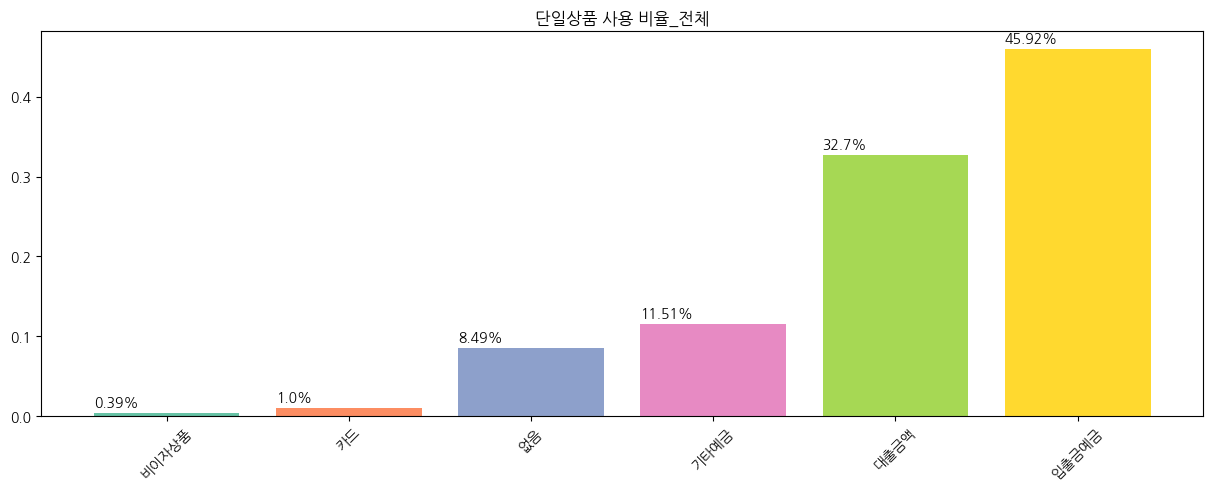

In [404]:
short_tmp = short_combinations['총합'].sort_values() / short_combinations['총합'].sum()

plt.figure(figsize=(15, 5))
bars = plt.bar(short_tmp.index, short_tmp.sort_values(), color=sns.color_palette("Set2"))
plt.title("단일상품 사용 비율_전체")
plt.xticks(rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, f"{round(yval * 100, 2)}%",va='bottom')
plt.show()

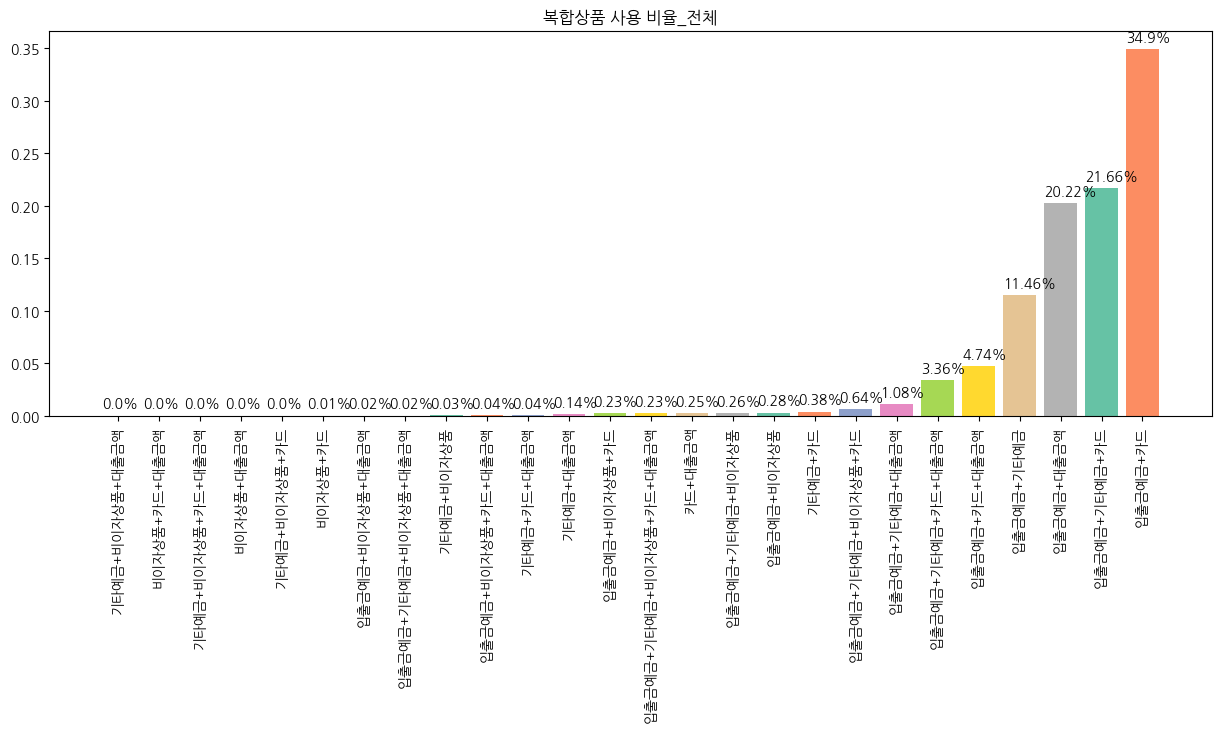

In [405]:
long_tmp = long_combinations['총합'].sort_values() / long_combinations['총합'].sum()

plt.figure(figsize=(15, 5))
bars = plt.bar(long_tmp.index, long_tmp.sort_values(), color=sns.color_palette("Set2"))
plt.title("복합상품 사용 비율_전체")
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, f"{round(yval * 100, 2)}%",va='bottom')
plt.show()